In [1]:
import json
import pandas as pd

jdict = {}
with open("dataset.json", "r") as rf:
        while True:
            line = rf.readline()
            if not line:
                break
            raw = json.loads(line)
            jdict[raw["headline"]] = raw["is_sarcastic"]

df = pd.DataFrame(jdict.items(), columns=["headline", "sarcastic"])
df.to_csv("headline_text.csv", sep='\t', encoding="utf-8")

In [1]:
from fastai.text import *
from fastai.callbacks import *
from fastai.metrics import *

data_lm = load_data("", "data_export.pkl", bs=50)
data_classifier = TextClasDataBunch.from_csv("", "headline_text.csv", vocab = data_lm.vocab, 
                                             text_cols="headline", label_cols="sarcastic", delimiter='\t', bs=50)

In [2]:
data_classifier.show_batch()

text,target
"xxbos ' 12 years a slave , ' ' captain phillips , ' ' american hustle , ' ' wolf of wall street , ' ' blue jasmine , ' ' dallas buyers club , ' ' her , ' ' nebraska , ' ' before midnight , ' and ' philomena ' all written during same continuing education screenwriting class",1
"xxbos hillary clinton : ' when i was a child , most special interest groups would n't even consider donating large sums of money to a woman '",1
"xxbos ' i 'd like you to post long , aggressive rants on social media , ' says bernie sanders in supporter 's interpretation of speech",1
xxbos u - haul offers discount for customers who will just move back home in 18 months after failure to make it in major city,1
"xxbos ' wow , no one saw this coming ' nation groans as norway 's ' xxunk - tiki ' xxunk best foreign picture nomination",1


In [3]:
learn = text_classifier_learner(data_classifier, AWD_LSTM, drop_mult=0.2, callback_fns=ShowGraph)
learn.load_encoder('learn-stage2-enc')

#Stage-1

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


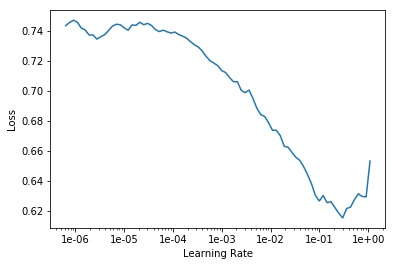

In [5]:
learn.lr_find()
learn.recorder.plot()

epoch,train_loss,valid_loss,accuracy,time
0,0.428008,0.369617,0.834618,00:11
1,0.409233,0.346973,0.849276,00:10
2,0.410201,0.341032,0.853035,00:11
3,0.382621,0.333970,0.851908,00:11
4,0.388095,0.345670,0.850592,00:11
5,0.369862,0.334781,0.847773,00:10
6,0.371861,0.335623,0.854727,00:10
7,0.362029,0.335175,0.850780,00:10
8,0.367664,0.344560,0.847021,00:11
9,0.366491,0.330546,0.850968,00:11


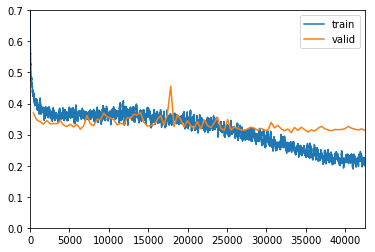

Better model found at epoch 0 with accuracy value: 0.834617555141449.
Better model found at epoch 1 with accuracy value: 0.8492764234542847.
Better model found at epoch 2 with accuracy value: 0.8530351519584656.
Better model found at epoch 6 with accuracy value: 0.8547265529632568.
Better model found at epoch 10 with accuracy value: 0.8567938208580017.
Better model found at epoch 12 with accuracy value: 0.8618680834770203.
Better model found at epoch 50 with accuracy value: 0.8628077507019043.
Better model found at epoch 63 with accuracy value: 0.8648750185966492.
Better model found at epoch 77 with accuracy value: 0.8673181533813477.
Better model found at epoch 99 with accuracy value: 0.8691975474357605.


In [4]:
learn.fit_one_cycle(100, 2e-2, 
                    callbacks=[SaveModelCallback(learn, every='improvement', monitor="accuracy", name="stage-1")])

In [5]:
learn.save("learn-clas-stage1")
learn.save_encoder("learn-clas-stage1-enc")

#Stage-2

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


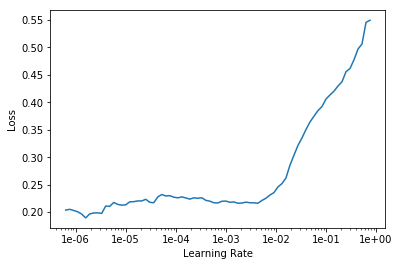

In [6]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

epoch,train_loss,valid_loss,accuracy,time
0,0.222864,0.313135,0.870325,00:33
1,0.222868,0.312614,0.868822,00:32
2,0.211261,0.309165,0.871265,00:33
3,0.199123,0.303821,0.872204,00:32
4,0.204859,0.299490,0.875587,00:33
5,0.187636,0.300234,0.875399,00:33
6,0.172501,0.285494,0.881413,00:33
7,0.160884,0.282898,0.889494,00:33
8,0.159500,0.290682,0.889119,00:32
9,0.149219,0.292660,0.890246,00:32


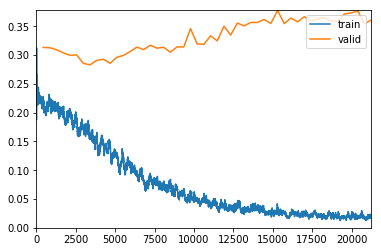

Better model found at epoch 0 with accuracy value: 0.8703251481056213.
Better model found at epoch 2 with accuracy value: 0.8712648153305054.
Better model found at epoch 3 with accuracy value: 0.8722044825553894.
Better model found at epoch 4 with accuracy value: 0.8755872845649719.
Better model found at epoch 6 with accuracy value: 0.8814132809638977.
Better model found at epoch 7 with accuracy value: 0.8894944787025452.
Better model found at epoch 9 with accuracy value: 0.8902462124824524.
Better model found at epoch 12 with accuracy value: 0.8909979462623596.
Better model found at epoch 14 with accuracy value: 0.8923134803771973.
Better model found at epoch 15 with accuracy value: 0.8941928148269653.
Better model found at epoch 17 with accuracy value: 0.8968238830566406.
Better model found at epoch 18 with accuracy value: 0.8990791440010071.
Better model found at epoch 20 with accuracy value: 0.8992670774459839.
Better model found at epoch 21 with accuracy value: 0.9000188112258911.

In [7]:
learn.fit_one_cycle(50, max_lr=slice(1e-6, 2e-3), 
                    callbacks=[SaveModelCallback(learn, every='improvement', monitor="accuracy", name="stage-1")])

In [10]:
learn.save("learn-clas-stage2")
learn.save_encoder("learn-clas-stage2-enc")

In [8]:
learn.predict("Man Annoyed At Being Mistaken For Employee Just Because He Driving Forklift Through Store")

(Category 1, tensor(1), tensor([5.8670e-05, 9.9994e-01]))

In [16]:
learn.save_encoder("0.2-drop-enc-no-headline-lm")